# Support Vector Machines

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs establish a hyperplane that separates the dataset by maximizing the margin.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np
import seaborn; 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from scipy import stats
import pylab as pl
import random
import pandas as pd
from IPython.html.widgets import interact
import ipywidgets as widgets
seaborn.set()

C:\Users\Mike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


Before starting with the exercises, watch the video from Josh Starmer on youtube.

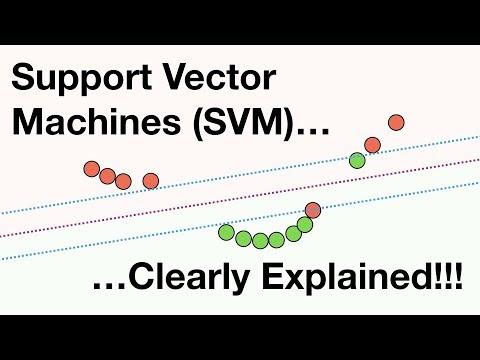

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('efR1C6CvhmE')

## Part 1

### Hessian normal form of a straight line

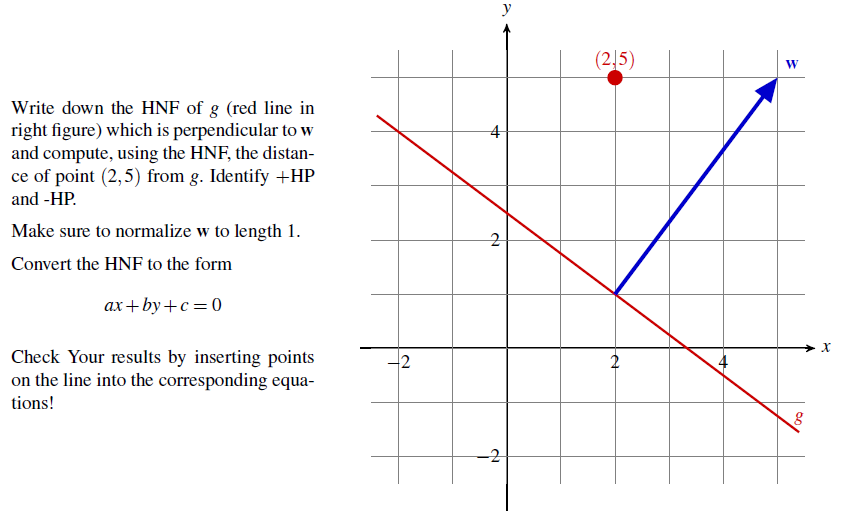

### Simple Example by Hand

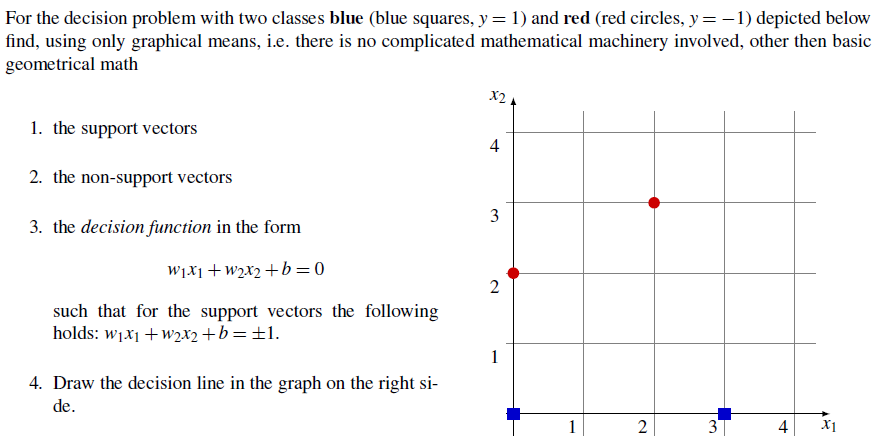

### Minimization Problem

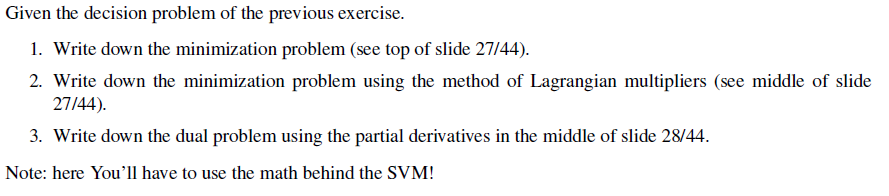

## Part 2 - Simple Example

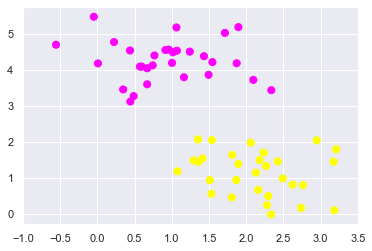

In [3]:
X, y = make_blobs(n_samples=60, centers=2,
                  random_state=0, cluster_std=0.60)
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.xlim(-1, 3.5);

> Now fit the model by using the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class from scikit-learn. Use a `linear` kernel.

In [4]:
# START YOUR CODE
# clf = ...
# END YOUR CODE

In [5]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

We plot de decision boundary. In the following plot the dashed lines touch a couple of the points known as *support vectors*, which are stored in the ``support_vectors_`` attribute of the classifier.

[ 1.19259775 -0.66829007]


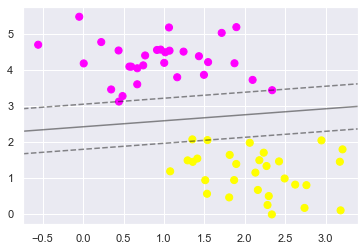

In [6]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
print(clf.decision_function([[2,2],[1,3]]))
plot_svc_decision_function(clf)

Now we want to indicate the support vectors by sourrounding circles.

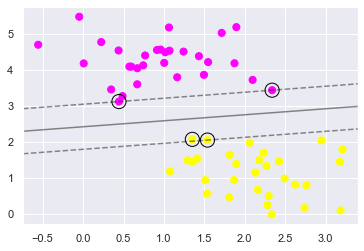

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none',edgecolors="black");
plot_svc_decision_function(clf)

The dataset above was non-overlapping, which means we could come up with a  hyperplane that separated the dataset perfectly. Let us now consider a dataset where no perfect separation is possible. In this case the SVM tries to minimize the datapoints lying on the wrong side of the hyperplane. These datapoints are considered support vectors as well.

At first, we generate the datapoints of the first class by sampling from a normal distribution with standard deviation 1.3 and mean (2,4)

In [8]:
num_entries=100
X=np.zeros((2*num_entries,2))
for i in range(0,num_entries):
    X[i,0]=np.random.normal()*1.3+2
    X[i,1]=np.random.normal()*1.3+4
y = num_entries*[0]

> Now we sample the data points from the second class with standard deviation 1.0 and mean (1,0). 

In [9]:
# START YOUR CODE
# y2 = 
# END YOUR CODE
for i in range(num_entries,2*num_entries):
    X[i,0]=np.random.normal()+1
    X[i,1]=np.random.normal()
y2 = num_entries*[1]

In [10]:
for i in range(num_entries,2*num_entries):
    X[i,0]=np.random.normal()+1
    X[i,1]=np.random.normal()
y2 = num_entries*[1]

Let us combine the class vectors `y` and `y2`

In [11]:
y.extend(y2)

print ("len X: ",len(X))
print ("len y: ",len(y))

len X:  200
len y:  200


Let us visualize the generated data samples. 

(-1.0, 3.5)

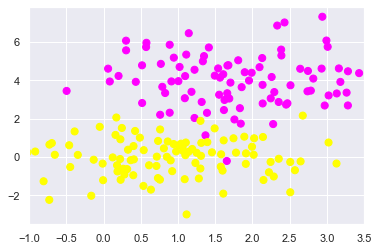

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.xlim(-1, 3.5)

> Now we train a linear SVM to find the best separating hyperplane.

In [13]:
# START YOUR CODE
# clf = ...
# END YOUR CODE
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [14]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

Let us again visualize the hyperplane and the support vectors.

(-1.0, 3.5)

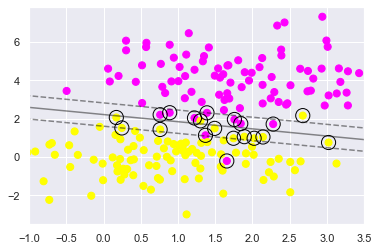

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none',edgecolors="black");
plot_svc_decision_function(clf)
plt.xlim(-1, 3.5)

## Part 3 - Support Vector Machine with Kernels Classifier

Kernels are useful when the decision boundary is not linear.  A Kernel is some functional transformation of the input data.  SVMs have clever tricks to ensure kernel calculations are efficient.  In the example below, a linear boundary is not useful in separating the groups of points.

In [16]:
X_circles, y_circles = make_circles(100, factor=.1, noise=.1)

> Create a linear SVM and fit it to X and y

In [17]:
# START YOUR CODE
# clf =  
# END YOUR CODE
clf = SVC(kernel='linear').fit(X_circles, y_circles)

In [18]:
clf = SVC(kernel='linear').fit(X_circles, y_circles)

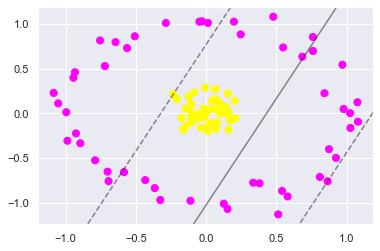

In [19]:
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, s=50, cmap='spring')
plot_svc_decision_function(clf);

A simple model that could be useful is a **radial basis function (rbf)**:

In [20]:
r = np.exp(-(X_circles[:, 0] ** 2 + X_circles[:, 1] ** 2))

@widgets.interact(elev=[-90, 90], azip=(-180, 180))
def plot_3D(elev=30, azim=30):
    #fig = plt.figure(figsize=(12,12))
    #ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X_circles[:, 0], X_circles[:, 1], r, c=y_circles, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In three dimensions, there is a clear separation between the data.  
> Run the SVM with the `rbf` kernel.

In [21]:
# START YOUR CODE
# clf = ... # create an SVM with kernel="rbf" (abbreviation for Radial Basis Function)
# END YOUR CODE

In [22]:
clf = SVC(kernel='rbf')
clf.fit(X_circles, y_circles)

SVC()

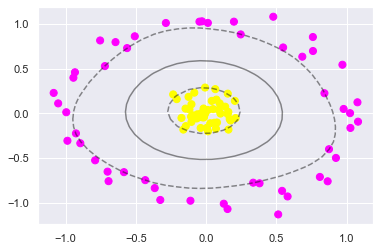

In [23]:
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

## Part 4 - Skin disease dataset
Now we want to apply the SVM on our skin disease data. Load this dataset using pandas.

In [24]:
df = pd.read_csv("skin_disease.csv")
df.head()

,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,0,0.0,1.0,145.589218,136.262619,89.286194,1.444699,1.121440,6.850170,-0.416775,-0.961082,-3.694071,1.782547,1.507777,8.454105
1,0,0.0,1.0,145.745285,136.358490,89.779877,1.527904,1.150789,6.972225,0.259111,-0.973702,-4.002241,1.891008,1.542660,8.602075
2,0,0.0,1.0,145.902649,136.442474,90.168144,1.612806,1.174493,6.978986,0.429408,-0.974900,-4.450916,1.988215,1.577558,8.610969
3,0,0.0,1.0,146.033340,136.516663,90.452774,1.659652,1.190121,6.952057,-0.541607,-0.988754,-4.659405,2.026301,1.597203,8.615275
4,0,0.0,1.0,146.152237,136.569550,90.808395,1.696972,1.185440,6.971071,-0.723738,-1.007998,-4.903327,2.068065,1.599503,8.667152


In order to save time, we only use 100000 entries for training / testing

In [25]:
df = df.sample(frac=1) # shuffling the data
df = df.iloc[0:100000]

Let us split this dataset into training and test set

In [26]:
train, test = train_test_split(df, test_size=0.5)
X_train = train.drop('class', axis=1)
X_test = test.drop('class', axis=1)
y_train = train["class"]
y_test = test["class"]

> Now train an SVM classifier on this dataset, which can take some minutes. Use the `rbf` kernel and a `gamma` value of 0.1.

In [27]:
# START YOUR CODE

# END YOUR CODE

In [28]:
clf = SVC(kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)

> Next, determine f-score and accuracy on the testset.

In [ ]:
# START YOUR CODE
# print ("f1 SVM:", f1)
# print ("accuracy SVM:", accuracy)
# END YOUR CODE

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print ("f1 SVM:", f1)
print ("accuracy SVM:", accuracy)

f1 SVM: 0.9654125555676027
accuracy SVM: 0.99362


> and compare the result with a  logistic regression model. Use the class [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from scikit-learn.

In [ ]:
# START YOUR CODE
# print ("accuracy logistic regression: ", accuracy)
# print ("f1 logistic regression: ", f1)
# END YOUR CODE

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print ("accuracy logistic regression: ", accuracy)
print ("f score logistic regression: ", f1)

accuracy logistic regression:  0.92148
f score logistic regression:  0.4630743982494529


C:\Users\Mike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Final remarks:
* When using an SVM you need to choose the right values for parameters such as `C` and `gamma`.  Model validation can help to determine these optimal values by trial and error.
* SVMs run in $O(n^3)$ performance.  [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) is scalable, [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) does not seem to be scalable.  For large data sets try transforming the data to a smaller space and use LinearSVC with rbf.

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree



In [15]:
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
data = ["silver","silver","white","black","white","black","black","black","black","red","red","red","silver","white","white","black","red","silver","white","white"]
a_list = list(range(1, 21))


print(len(a_list))

print(data)

#clf = clf.fit(iris.data, iris.target)
clf = clf.fit(data)
#tree.plot_tree(clf)
tree.plot_tree(clf)

20
['silver', 'silver', 'white', 'black', 'white', 'black', 'black', 'black', 'black', 'red', 'red', 'red', 'silver', 'white', 'white', 'black', 'red', 'silver', 'white', 'white']


ValueError: could not convert string to float: 'silver'